In [1]:
from octo.data.dataset import make_single_dataset
from octo.data.utils.data_utils import NormalizationType

2023-12-26 23:55:02.929118: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-26 23:55:02.929179: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-26 23:55:02.966941: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-26 23:55:03.047639: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-26 23:55:04.046043: W tensorflow/compiler/tf2

In [2]:
data_dir = "/home/jannik/Downloads/example_sim_data/aloha_sim_dataset/"

dataset = make_single_dataset(
    dataset_kwargs=dict(
        name="aloha_sim_cube_scripted_dataset",
        data_dir=data_dir,
        image_obs_keys={"primary": "top"},
        state_obs_keys=["state"],
        language_key="language_instruction",
        action_proprio_normalization_type=NormalizationType.NORMAL,
        absolute_action_mask=[True] * 14,
    ),
    traj_transform_kwargs=dict(
        window_size=1,
        future_action_window_size=49,  # so we get 50 actions for our action chunk
    ),
    frame_transform_kwargs=dict(
        resize_size={"primary": (256, 256)},
    ),
    train=True,
)

2023-12-26 23:55:06.073835: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5719 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070, pci bus id: 0000:01:00.0, compute capability: 8.6
2023-12-26 23:55:06.211329: I tensorflow/core/grappler/optimizers/data/replicate_on_split.cc:32] Running replicate on split optimization
2023-12-26 23:55:06.738258: I tensorflow/core/grappler/optimizers/data/replicate_on_split.cc:32] Running replicate on split optimization


DLIMP: Core usage is through the `DLataset` a thin wrapper around `tf.data.Dataset` designed for working with datasets of trajectories

In [3]:
type(dataset)

dlimp.dataset.DLataset

In [4]:
len(dataset)

48

In [5]:
first_episode = list(dataset)[0]

In [6]:
first_episode.keys()

dict_keys(['observation', 'task', 'action', 'dataset_name', 'absolute_action_mask'])

In [9]:
first_episode["observation"].keys()

dict_keys(['image_primary', 'proprio', 'timestep', 'pad_mask_dict', 'pad_mask'])

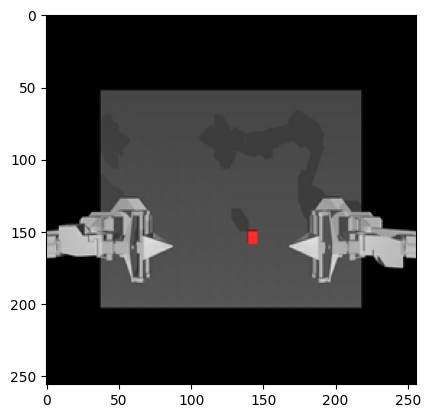

In [14]:
import matplotlib.pyplot as plt

plt.imshow(first_episode["observation"]["image_primary"][0][0].numpy())
